# Analysis 

In [1]:
import os 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pickle
import torch 
import torchvision
from omegaconf import OmegaConf
sns.set_style("whitegrid")
save_path = "results/seed-0"

# Step1 

In [2]:
CLS_ENT = pickle.load(open(f"{save_path}/cls_entropy.pkl", mode='rb'))
SP_IDX  = pickle.load(open(f"{save_path}/sample_index.pkl", mode='rb'))
flags = OmegaConf.load(f"{save_path}/config.yaml")

train_dataset =  torchvision.datasets.MNIST(root=flags.data_path, train=True, transform=torchvision.transforms.ToTensor())

<AxesSubplot:>

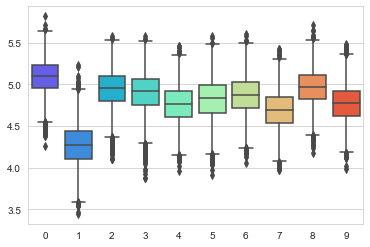

In [3]:
# CLS-wise entropy distribution
sns.boxplot(CLS_ENT.numpy().T, palette='rainbow')

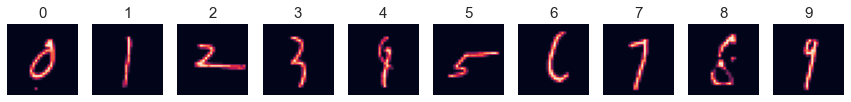

In [4]:
# CLS-wise MIN entropy samples
sns.set_style("white")
fig, axes = plt.subplots(1, 10, figsize=(15, 1.5))
axes = axes.flat #[Role]:???
for cls in range(10):
    population = CLS_ENT[cls]
    v, index =  torch.sort(population, descending=False) # increasing  #[Role]:???
    index = SP_IDX[cls][index[0].item()]
    ax = next(axes) #[Role]:???
    ax.imshow(train_dataset[index][0].squeeze(0))
    ax.set_axis_off()
    ax.set_title(cls, fontsize=15)

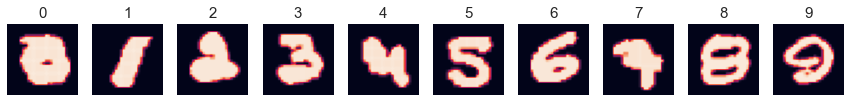

In [5]:
# CLS-wise MAX entropy samples
sns.set_style("white")
fig, axes = plt.subplots(1, 10, figsize=(15, 1.5))
axes = axes.flat
for cls in range(10):
    population = CLS_ENT[cls]
    v, index =  torch.sort(population, descending=True) # increasing 
    index = SP_IDX[cls][index[0].item()]
    ax = next(axes)
    ax.imshow(train_dataset[index][0].squeeze(0))
    ax.set_axis_off()
    ax.set_title(cls, fontsize=15)

#  Step2 

In [6]:
Y = pickle.load(open(f"{save_path}/Y.pkl", mode='rb')).numpy()
Y_HAT  = pickle.load(open(f"{save_path}/Y_HAT.pkl", mode='rb')).numpy()

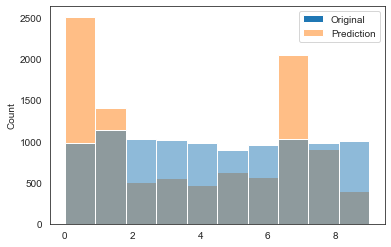

In [7]:
sns.histplot([Y, Y_HAT], bins=10)
plt.legend(['Original', 'Prediction'])

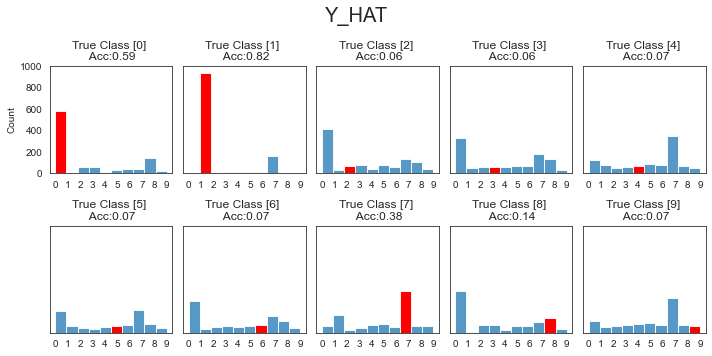

In [8]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
fig.suptitle("Y_HAT", fontsize=20)
axes = axes.flat
for cls in range(10):
    idx = (Y == cls) #[Role]:???
    ax = next(axes)
    g = sns.histplot(Y_HAT[idx], ax=ax, bins=10)
    if cls !=0:
        ax.set_ylabel(None)
        ax.set_yticklabels([])
        # ax.set_xticklabels([i for i in range(10)])
    ax.set_xticks([i for i in range(10)]) 
    ax.set_ylim([0,1000]) #[Role]:???
    acc = (Y_HAT[idx] == cls).sum() / idx.sum() 
    ax.set_title(f"True Class [{cls}] \n Acc:{acc:.2f}")
    g.patches[cls].set_facecolor('red')
plt.tight_layout()